In [295]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pygame as pg

In [296]:
def create_spiral_surface(A, B, n=101, size=(101, 101)):
    t = np.linspace(0, 4 * np.pi, n)
    x = A * t * np.cos(B * t)
    y = A * t * np.sin(B * t)
    
    x -= np.min(x)
    y -= np.min(y)
    
    f = plt.figure()
    ax = f.add_subplot()
    ax.plot(x, y, linewidth=5)

    x_pixels = np.expand_dims(np.asarray(np.round((x / np.max(x)) * size[0]) - 1, dtype=np.int16), axis=1)
    y_pixels = np.expand_dims(np.asarray(np.round((y / np.max(y)) * size[1]) - 1, dtype=np.int16), axis=1)
    
    coords = np.concatenate([x_pixels, y_pixels], axis=1)
    midpoint = np.array(np.floor((size[0] - 1) / 2), dtype=np.int16)
    delta = (midpoint - coords[0, :]) * 2
    coords += delta
    
    spiral_array = np.ones((*size, 3)) * 255  # initial white
    spiral_array = np.concatenate([np.ones((delta[0], size[1], 3)) * 255, spiral_array], axis=0)
    spiral_array = np.concatenate([np.ones((size[0] + delta[0], delta[1], 3)) * 255, spiral_array], axis=1)
    coords = np.unique(coords, axis=0)
    
    for pos in coords:
        for x_pos in range(int(pos[0]-1), int(pos[0]+2)):
            for y_pos in range(int(pos[1]-1), int(pos[1]+2)):
                if 0 <= x_pos < size[0] + delta[0] and 0 <= y_pos < size[1] + delta[1]:
                    spiral_array[x_pos, y_pos, :] = 0
                    
    spiral_surf = pg.surfarray.make_surface(spiral_array)
    
    # cv2.imwrite("Spiral_test.png", blank)
    return spiral_surf


<Surface(318x318x32 SW)>

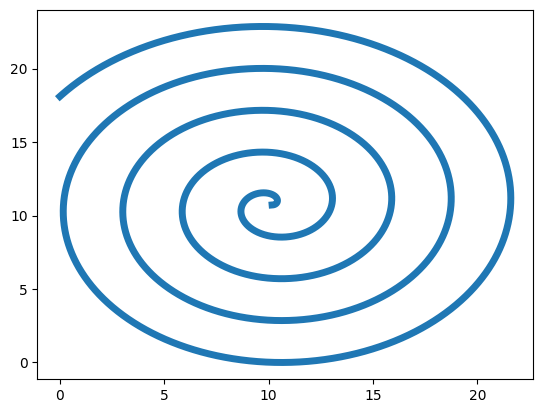

In [297]:
scaling_factor = 1
turns_factor = 2.2
create_spiral_surface(scaling_factor, turns_factor, n=100000, size=(300, 300))